# Matplotlib -> Seaborn

## You can (and often want to) use Matplotlib on its own

In [1]:
import matplotlib.pyplot as plt

## let's plot some lines

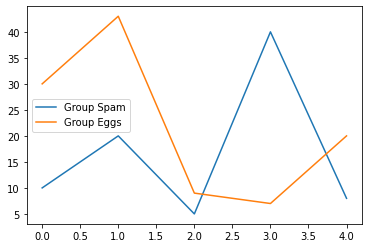

In [2]:
def plot_some_lines():
    plt.figure()
    x1 = [10,20,5,40,8]
    x2 = [30,43,9,7,20]
    plt.plot(x1, label="Group Spam")
    plt.plot(x2, label="Group Eggs")
    plt.legend()
    plt.show()

plot_some_lines()

## But many folks prefer to use tools built on top of Matplotlib

In [3]:
import seaborn as sns

## As we saw recently, Seaborn is such a tool. 

Seaborn can pretty up Matplotlib very easily.

In [4]:
sns.set()

Seaborn has taken control of the figure's aesthetics.

Now show the matplotlib plots again

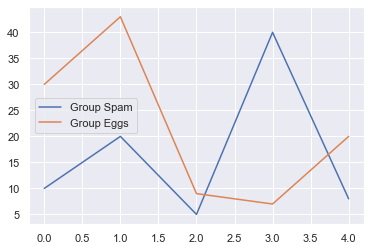

In [5]:
plot_some_lines()

## Seaborn has some very handy data sets built in

In [35]:
sns.load_dataset?

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr

In [36]:
sns.get_dataset_names() # requires bs4
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### And we can use them just like a dataframe that came from a CSV

    



,origin,mpg
0,europe,28.411111
1,japan,31.595652
2,usa,27.840278


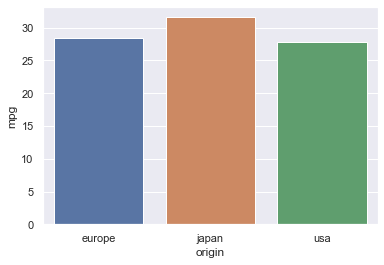

In [61]:
four_cylinders = mpg_df[mpg_df.cylinders == 4]
mpg_by_origin = four_cylinders.groupby("origin", as_index=False).mpg.mean()
sns.barplot(x="origin",y="mpg",data=mpg_by_origin)
mpg_by_origin

<AxesSubplot:xlabel='cylinders', ylabel='count'>

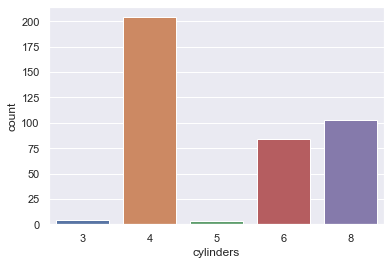

In [62]:
sns.countplot(data=mpg_df, x="cylinders")

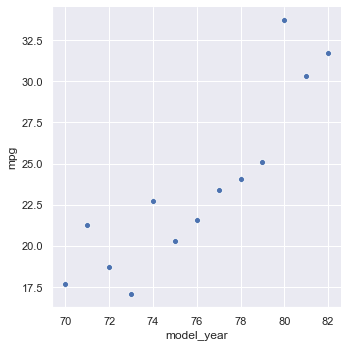

In [67]:
avg_mpg = mpg_df.groupby("model_year", as_index=False).mpg.mean()
sns.relplot(x="model_year",y="mpg",data=avg_mpg)

In [34]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


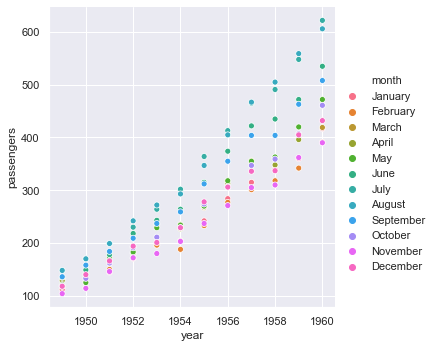

In [7]:
sns.relplot(x="year",y="passengers", hue="month", data=flights)

Let's consolidate the data by combining months

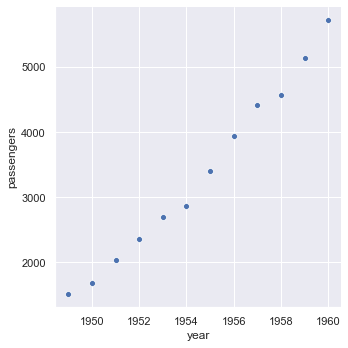

In [8]:
year_sums = flights.groupby("year", as_index=False).sum()
sns.relplot(x='year', y='passengers', data=year_sums)

### And we can make some predictions.


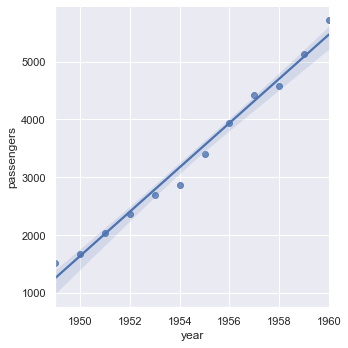

In [9]:
sns.lmplot(x="year",y="passengers",data=year_sums)

Apparently more people are flying year over year (unless there's a pandemic)

But do those visualizations best convey that notion?
Or are there better choices available?

How much work would it take to use another type of graph in Seaborn?

    




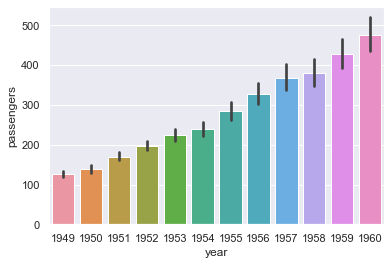

In [10]:
graph = sns.barplot(x="year", y="passengers", data=flights)

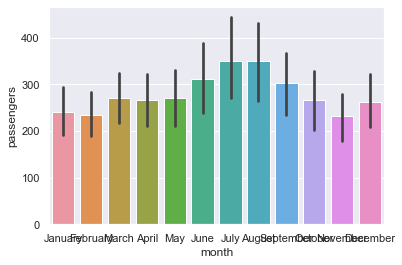

In [11]:
graph = sns.barplot(x="month", y="passengers", data=flights)

Hmm. We're getting somewhere but those month labels are all smushed up

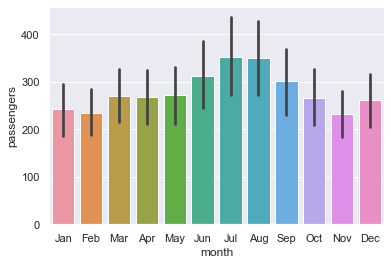

In [12]:
from calendar import month_abbr

g=sns.barplot(x="month",y="passengers", data=flights)

g.set_xticklabels(labels=list(month_abbr)[1:])

print()

What are those black lines jutting out the top?
That's called the confidence interval

You can modify (or remove) them if you like


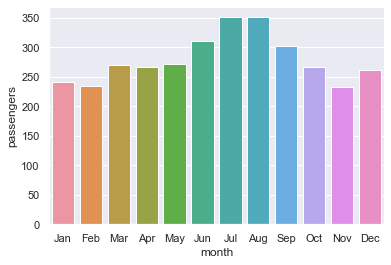

In [13]:
from calendar import month_abbr

g=sns.barplot(x="month",y="passengers", data=flights, ci=None)

g.set_xticklabels(labels=list(month_abbr)[1:])

print()